# Gradient Boosting Decision Trees

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

## San Francisco

In [3]:
SF_data = pd.read_csv("../data/cleaned_data/SanFrancisco.csv", index_col=0)
SF_data

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,violent,street1,street2,str1,str2
0,2015-05-13 23:53:00,WARRANTS,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,True,OAK ST,LAGUNA ST,OAK ST,LAGUNA ST
1,2015-05-13 23:53:00,OTHER OFFENSES,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,False,OAK ST,LAGUNA ST,OAK ST,LAGUNA ST
2,2015-05-13 23:33:00,OTHER OFFENSES,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,False,VANNESS AV,GREENWICH ST,VANNESS AV,GREENWICH ST
3,2015-05-13 23:30:00,LARCENY/THEFT,2,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,False,1500 Block of LOMBARD ST,NaN,other,other
4,2015-05-13 23:30:00,LARCENY/THEFT,2,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,False,100 Block of BRODERICK ST,NaN,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,0,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,True,FARALLONES ST,CAPITOL AV,other,CAPITOL AV
878045,2003-01-06 00:01:00,LARCENY/THEFT,0,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,False,600 Block of EDNA ST,NaN,other,other
878046,2003-01-06 00:01:00,LARCENY/THEFT,0,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,False,5TH ST,FOLSOM ST,5TH ST,FOLSOM ST
878047,2003-01-06 00:01:00,VANDALISM,0,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,True,TOWNSEND ST,2ND ST,other,2ND ST


In [4]:
SF_data1 = pd.get_dummies(SF_data.drop(columns = ["Dates", "Category", "Address", "street1", "street2", "PdDistrict", "str1", "str2"]))
SF_data1

,DayOfWeek,X,Y,year,month,day,hour,violent
0,2,-122.425892,37.774599,2015,5,13,23,True
1,2,-122.425892,37.774599,2015,5,13,23,False
2,2,-122.424363,37.800414,2015,5,13,23,False
3,2,-122.426995,37.800873,2015,5,13,23,False
4,2,-122.438738,37.771541,2015,5,13,23,False
...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True
878045,0,-122.447364,37.731948,2003,1,6,0,False
878046,0,-122.403390,37.780266,2003,1,6,0,False
878047,0,-122.390531,37.780607,2003,1,6,0,True


In [5]:
X = SF_data1.loc[:, SF_data1.columns != 'violent']
y = SF_data1.violent

### Finding a Depth Baseline

In [146]:
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 0)
for depth in range (5, 21):
    tree_classifier = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y, scoring = 'accuracy', cv = crossvalidation, n_jobs = 1))
    
    print(depth, score)

5 0.5627302116806544
6 0.5719490823968852
7 0.5783341794441443
8 0.5797317027297277
9 0.5828889407720514
10 0.5844743954845116
11 0.5865871960365323
12 0.5876282196540337
13 0.5888150344931865
14 0.5888845112367738
15 0.5887785879331398
16 0.5874106759249405
17 0.5865723909037701
18 0.5846999174828983
19 0.5829629766322973
20 0.5800870657288176


This shows that we get the best accuracy (58.888%) when max depth is limited to 14.

### Split the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Make the Gradient Boosting Trees

In [7]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3648            9.34m
         2           1.3464            9.50m
         3           1.3301            9.32m
         4           1.3157            9.19m
         5           1.3026            9.23m
         6           1.2910            9.25m
         7           1.2801            9.21m
         8           1.2695            9.05m
         9           1.2598            8.93m
        10           1.2509            8.88m
        20           1.1885            7.49m
        30           1.1471            6.28m
        40           1.1186            5.14m
        50           1.1022            4.05m
        60           1.0868            3.10m
        70           1.0723            2.25m
        80           1.0607            1.46m
        90           1.0471           43.54s
       100           1.0355            0.00s


### Creating a confusion matrix

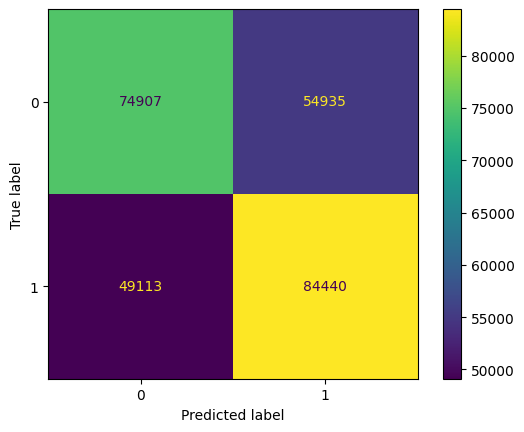

In [8]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [9]:
print("Accuracy of Gradient Boosting model 1:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 1: 0.6049735188595076


In [10]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.6322583543611899


In [11]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.5769088584587422


In [12]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.20929759809865234


### Include PdDistrict

In [13]:
SF_data2 = pd.get_dummies(SF_data.drop(columns = ["Dates", "Category", "Address", "street1", "street2", "str1", "str2"]))
SF_data2

,DayOfWeek,X,Y,year,month,day,hour,violent,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2,-122.425892,37.774599,2015,5,13,23,True,0,0,0,0,1,0,0,0,0,0
1,2,-122.425892,37.774599,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
2,2,-122.424363,37.800414,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
3,2,-122.426995,37.800873,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
4,2,-122.438738,37.771541,2015,5,13,23,False,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True,0,0,0,0,0,0,0,0,1,0
878045,0,-122.447364,37.731948,2003,1,6,0,False,0,0,1,0,0,0,0,0,0,0
878046,0,-122.403390,37.780266,2003,1,6,0,False,0,0,0,0,0,0,0,1,0,0
878047,0,-122.390531,37.780607,2003,1,6,0,True,0,0,0,0,0,0,0,1,0,0


In [14]:
X = SF_data2.loc[:, SF_data2.columns != 'violent']
y = SF_data2.violent

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [17]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3659           10.43m
         2           1.3484           10.48m
         3           1.3327           10.10m
         4           1.3189            9.91m
         5           1.3063            9.78m
         6           1.2949            9.65m
         7           1.2840            9.50m
         8           1.2742            9.37m
         9           1.2652            9.22m
        10           1.2564            9.10m
        20           1.1931            7.82m
        30           1.1524            6.47m
        40           1.1242            5.32m
        50           1.1025            4.29m
        60           1.0834            3.35m
        70           1.0662            2.46m
        80           1.0531            1.61m
        90           1.0418           47.46s
       100           1.0314            0.00s


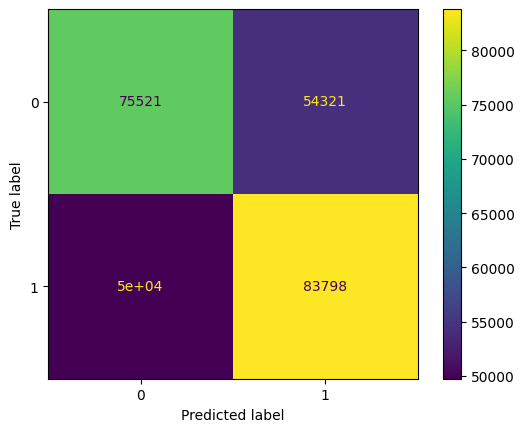

In [18]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [19]:
print("Accuracy of Gradient Boosting model 2:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 2: 0.6048672146396097


In [20]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.6274512740260421


In [21]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.5816376827220776


In [22]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.20919116156225448


### Include str1 and str2

In [23]:
SF_data3 = pd.get_dummies(SF_data.drop(columns = ["Dates", "Category", "Address", "street1", "street2"]))
SF_data3

,DayOfWeek,X,Y,year,month,day,hour,violent,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,...,str2_VANNESS AV,str2_VERMONT ST,str2_VICENTE ST,str2_WALLER ST,str2_WASHINGTON ST,str2_WEBSTER ST,str2_WINSTON DR,str2_WISCONSIN ST,str2_YORK ST,str2_other
0,2,-122.425892,37.774599,2015,5,13,23,True,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,-122.425892,37.774599,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-122.424363,37.800414,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-122.426995,37.800873,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,-122.438738,37.771541,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0
878045,0,-122.447364,37.731948,2003,1,6,0,False,0,0,...,0,0,0,0,0,0,0,0,0,1
878046,0,-122.403390,37.780266,2003,1,6,0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,-122.390531,37.780607,2003,1,6,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X = SF_data3.loc[:, SF_data3.columns != 'violent']
y = SF_data3.violent

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  

In [26]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3655           20.49m
         2           1.3478           20.69m
         3           1.3323           21.46m
         4           1.3186           21.84m
         5           1.3065           21.94m
         6           1.2958           21.95m
         7           1.2846           21.81m
         8           1.2752           21.68m
         9           1.2661           21.47m
        10           1.2578           21.28m
        20           1.1990           18.86m
        30           1.1664           17.29m
        40           1.1459           15.50m
        50           1.1349           14.67m
        60           1.1299           11.98m
        70           1.1241            9.19m
        80           1.1188            6.19m
        90           1.1131            3.12m
       100           1.1084            0.00s


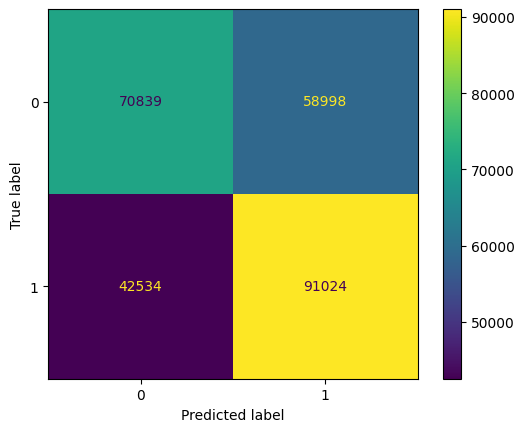

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [28]:
print("Accuracy of Gradient Boosting model 3:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 3: 0.6145257123331878


In [29]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.6815316192216115


In [30]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.5455994824279674


In [31]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.22753302301168477


## Montreal 

In [87]:
MR_data = pd.read_csv("../data/cleaned_data/MontReal.csv")
MR_data

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude,month,day,hour,DayOfWeek,postal_code_1,postal_code_2,pc1,pc2,violent
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567,9,13,0,3,H1Z,1S9,H1Z,1S9,False
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567,4,30,0,0,H1Z,1S9,H1Z,1S9,False
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,1,10,0,2,H1Z,2V6,H1Z,2V6,False
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,11,12,0,0,H1Z,2V6,H1Z,2V6,True
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,8,15,0,2,H1Z,2V6,H1Z,2V6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136637,136637,Motor vehicle theft,2020-03-25,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452,3,25,0,2,H4Y,1G6,H4Y,1G6,False
136638,136638,Motor vehicle theft,2020-03-27,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452,3,27,0,4,H4Y,1G6,H4Y,1G6,False
136639,136639,Mischief,2021-04-01,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452,4,1,0,3,H4Y,1G6,H4Y,1G6,True
136640,136640,Home Invasion,2021-06-06,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452,6,6,0,6,H4Y,1G6,H4Y,1G6,False


In [88]:
MR_data1 = pd.get_dummies(MR_data.drop(columns = ["Unnamed: 0", 'count', 'category', 'date', 'neighbourhood', 'postal_code', 'postal_code_1', 'postal_code_2', 'pc1', 'pc2']))
MR_data1

,year,longitude,latitude,month,day,hour,DayOfWeek,violent,city_ANJOU,city_BAIE-D'URFE,...,city_POINTE-AUX-TREMBLES,city_POINTE-CLAIRE,city_ROXBORO,city_SAINT-LAURENT,city_SAINT-LEONARD,city_SAINTE-ANNE-DE-BELLEVUE,city_SAINTE-GENEVIEVE,city_SENNEVILLE,city_VERDUN,city_WESTMOUNT
0,2018,-73.626,45.567,9,13,0,3,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,-73.626,45.567,4,30,0,0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,-73.629,45.569,1,10,0,2,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,-73.629,45.569,11,12,0,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,-73.629,45.569,8,15,0,2,True,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136637,2020,-73.752,45.452,3,25,0,2,False,0,0,...,0,0,0,0,0,0,0,0,0,0
136638,2020,-73.752,45.452,3,27,0,4,False,0,0,...,0,0,0,0,0,0,0,0,0,0
136639,2021,-73.752,45.452,4,1,0,3,True,0,0,...,0,0,0,0,0,0,0,0,0,0
136640,2021,-73.752,45.452,6,6,0,6,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X = MR_data1.loc[:, MR_data1.columns != 'violent']
y = MR_data1.violent

### Split the Data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Make the Gradient Boosting Trees

In [91]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3397           51.67s
         2           1.3072           52.20s
         3           1.2789           52.56s
         4           1.2538           53.68s
         5           1.2305           54.09s
         6           1.2070           54.66s
         7           1.1878           54.07s
         8           1.1645           54.09s
         9           1.1458           53.84s
        10           1.1274           53.32s
        20           0.9650           49.50s
        30           0.8686           41.49s
        40           0.8006           34.31s
        50           0.7543           27.71s
        60           0.7129           21.67s
        70           0.6774           15.99s
        80           0.6476           10.56s
        90           0.6222            5.21s
       100           0.5938            0.00s


### Create a Confusion Matrix

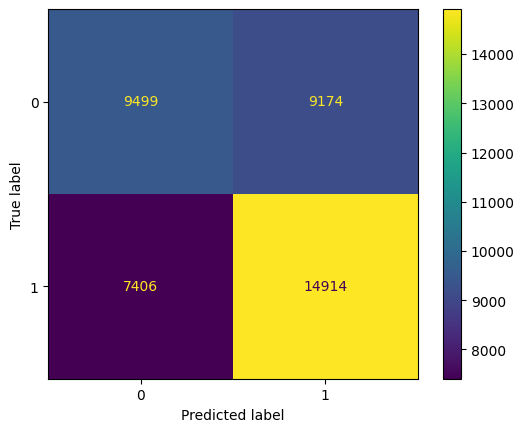

In [92]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [93]:
print("Accuracy of Gradient Boosting model 1:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 1: 0.5955407020710853


In [94]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.668189964157706


In [95]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.5087024045413163


In [96]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.1782713593342634


### Include neighborhood

In [97]:
MR_data2 = pd.get_dummies(MR_data.drop(columns = ["Unnamed: 0", 'count', 'category', 'date', 'postal_code', 'postal_code_1', 'postal_code_2', 'pc1', 'pc2']))
MR_data2

,year,longitude,latitude,month,day,hour,DayOfWeek,violent,city_ANJOU,city_BAIE-D'URFE,...,neighbourhood_Saint-Léonard,neighbourhood_Saint-Michel,"neighbourhood_Saint-Michel,East",neighbourhood_Sainte-Anne-De-Bellevue,neighbourhood_Sainte-Geneviève / Pierrefonds,neighbourhood_Senneville,neighbourhood_Verdun,neighbourhood_Ville Émard,neighbourhood_Villeray,neighbourhood_Westmount
0,2018,-73.626,45.567,9,13,0,3,False,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2018,-73.626,45.567,4,30,0,0,False,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2018,-73.629,45.569,1,10,0,2,False,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2018,-73.629,45.569,11,12,0,0,True,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2018,-73.629,45.569,8,15,0,2,True,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136637,2020,-73.752,45.452,3,25,0,2,False,0,0,...,0,0,0,0,0,0,0,0,0,0
136638,2020,-73.752,45.452,3,27,0,4,False,0,0,...,0,0,0,0,0,0,0,0,0,0
136639,2021,-73.752,45.452,4,1,0,3,True,0,0,...,0,0,0,0,0,0,0,0,0,0
136640,2021,-73.752,45.452,6,6,0,6,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X = MR_data2.loc[:, MR_data2.columns != 'violent']
y = MR_data2.violent

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [100]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3518            1.12m
         2           1.3277            1.13m
         3           1.3079            1.12m
         4           1.2871            1.08m
         5           1.2690            1.08m
         6           1.2541            1.07m
         7           1.2387            1.07m
         8           1.2252            1.06m
         9           1.2105            1.05m
        10           1.1969            1.05m
        20           1.1009           57.35s
        30           1.0117           51.09s
        40           0.9449           44.70s
        50           0.8954           37.12s
        60           0.8522           29.37s
        70           0.8187           21.93s
        80           0.7944           14.37s
        90           0.7535            7.19s
       100           0.7254            0.00s


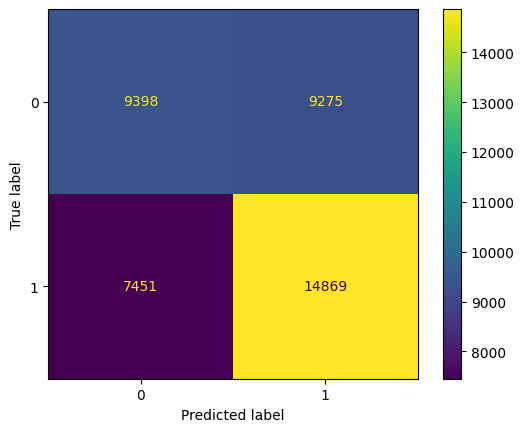

In [101]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [102]:
print("Accuracy of Gradient Boosting model 2:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 2: 0.5919791183860659


In [103]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.666173835125448


In [104]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.5032935254110212


In [105]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.1708306500928216


### Include pc1 and pc2

In [106]:
MR_data3 = pd.get_dummies(MR_data.drop(columns = ["Unnamed: 0", 'count', 'category', 'date', 'postal_code', 'postal_code_1', 'postal_code_2']))
MR_data3

,year,longitude,latitude,month,day,hour,DayOfWeek,violent,city_ANJOU,city_BAIE-D'URFE,...,pc2_2Y9,pc2_2Z6,pc2_3A3,pc2_3B5,pc2_3C5,pc2_3C6,pc2_3G5,pc2_3V6,pc2_4E3,pc2_other
0,2018,-73.626,45.567,9,13,0,3,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,-73.626,45.567,4,30,0,0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,-73.629,45.569,1,10,0,2,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,-73.629,45.569,11,12,0,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,-73.629,45.569,8,15,0,2,True,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136637,2020,-73.752,45.452,3,25,0,2,False,0,0,...,0,0,0,0,0,0,0,0,0,0
136638,2020,-73.752,45.452,3,27,0,4,False,0,0,...,0,0,0,0,0,0,0,0,0,0
136639,2021,-73.752,45.452,4,1,0,3,True,0,0,...,0,0,0,0,0,0,0,0,0,0
136640,2021,-73.752,45.452,6,6,0,6,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
X = MR_data3.loc[:, MR_data3.columns != 'violent']
y = MR_data3.violent

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  

In [109]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3582            3.74m
         2           1.3407            3.72m
         3           1.3250            3.69m
         4           1.3097            3.64m
         5           1.2968            3.59m
         6           1.2839            3.50m
         7           1.2730            3.47m
         8           1.2591            3.45m
         9           1.2486            3.41m
        10           1.2386            3.38m
        20           1.1710            2.94m
        30           1.1330            2.57m
        40           1.1063            2.16m
        50           1.0788            1.76m
        60           1.0555            1.38m
        70           1.0338            1.03m
        80           1.0114           40.57s
        90           0.9928           20.14s
       100           0.9724            0.00s


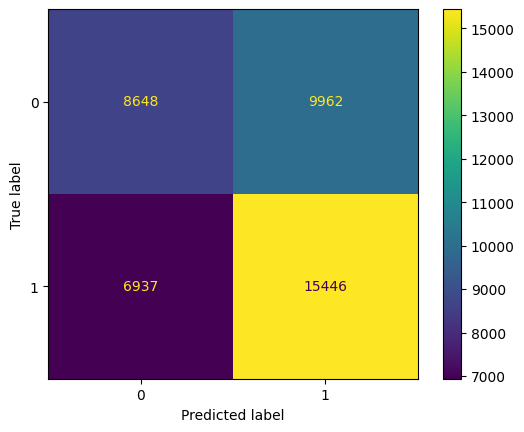

In [110]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [111]:
print("Accuracy of Gradient Boosting model 3:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 3: 0.587758885663406


In [112]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.6900772908010544


In [113]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.4646963997850618


In [114]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.15692352783683872


## Denver

In [116]:
DV_data = pd.read_csv("../data/cleaned_data/denver.csv", index_col=0)
DV_data

,OFFENSE_CATEGORY_ID,INCIDENT_ADDRESS,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,year,month,day,hour,DayOfWeek,street,str,violent
0,public-disorder,2920 W 32ND AVE,3133773.0,1702660.0,1,113,highland,2017,6,25,20,6,32ND,32ND,True
1,public-disorder,13400 E ALBROOK DR,3185904.0,1709037.0,5,521,montbello,2017,5,26,19,4,ALBROOK,ALBROOK,True
2,public-disorder,1600 BLOCK 16TH ST,3140436.0,1699005.0,6,612,union-station,2017,6,27,16,1,16TH,16TH,True
3,public-disorder,2200 BLOCK MARKET ST,3143338.0,1700561.0,6,612,five-points,2017,5,26,19,4,MARKET,MARKET,True
4,public-disorder,1733 N GROVE ST,3132994.0,1696487.0,1,121,west-colfax,2017,7,7,21,4,GROVE,GROVE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399567,auto-theft,934 16TH ST,3142109.0,1697318.0,6,611,cbd,2022,10,2,21,6,16TH,16TH,False
399568,auto-theft,4905 N CATHAY ST,3206327.0,1712283.0,5,523,gateway-green-valley-ranch,2022,10,3,14,0,CATHAY,other,False
399569,white-collar-crime,1551S S ROSLYN ST,3168587.0,1676396.0,3,322,indian-creek,2022,8,3,12,2,ROSLYN,other,False
399570,white-collar-crime,1727 N PEARL ST,3146166.0,1696259.0,6,621,north-capitol-hill,2022,7,17,10,6,PEARL,PEARL,False


In [117]:
DV_data1 = pd.get_dummies(DV_data.drop(columns = ["OFFENSE_CATEGORY_ID", "INCIDENT_ADDRESS", "DISTRICT_ID", "PRECINCT_ID", "NEIGHBORHOOD_ID", "street", "str"]))
DV_data1

,GEO_X,GEO_Y,year,month,day,hour,DayOfWeek,violent
0,3133773.0,1702660.0,2017,6,25,20,6,True
1,3185904.0,1709037.0,2017,5,26,19,4,True
2,3140436.0,1699005.0,2017,6,27,16,1,True
3,3143338.0,1700561.0,2017,5,26,19,4,True
4,3132994.0,1696487.0,2017,7,7,21,4,True
...,...,...,...,...,...,...,...,...
399567,3142109.0,1697318.0,2022,10,2,21,6,False
399568,3206327.0,1712283.0,2022,10,3,14,0,False
399569,3168587.0,1676396.0,2022,8,3,12,2,False
399570,3146166.0,1696259.0,2022,7,17,10,6,False


In [118]:
X = DV_data1.loc[:, DV_data1.columns != 'violent']
y = DV_data1.violent

### Split the Data

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Make the Gradient Boosting Trees

In [120]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3045            3.05m
         2           1.2815            3.00m
         3           1.2617            2.96m
         4           1.2427            2.96m
         5           1.2256            2.95m
         6           1.2093            2.95m
         7           1.1957            2.90m
         8           1.1827            2.88m
         9           1.1715            2.83m
        10           1.1584            2.82m
        20           1.0679            2.49m
        30           1.0156            2.12m
        40           0.9742            1.77m
        50           0.9389            1.45m
        60           0.9168            1.13m
        70           0.8910           49.97s
        80           0.8655           32.96s
        90           0.8489           16.27s
       100           0.8303            0.00s


### Create a Confusion Matrix

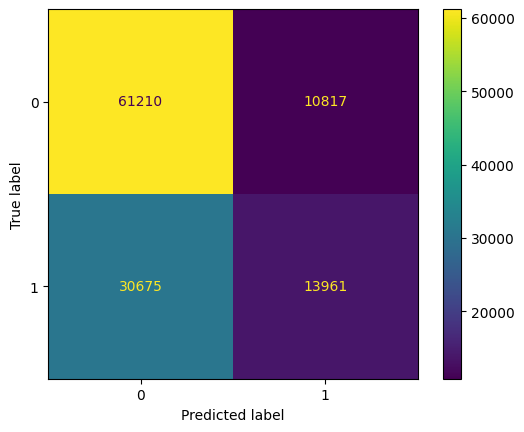

In [121]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [122]:
print("Accuracy of Gradient Boosting model 1:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 1: 0.6443431079262492


In [123]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.3127744421543149


In [124]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.8498202063115221


In [125]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.1776200010399276


### Include PRECINCT_ID

In [126]:
DV_data2 = pd.get_dummies(DV_data.drop(columns = ["OFFENSE_CATEGORY_ID", "INCIDENT_ADDRESS", "DISTRICT_ID", "NEIGHBORHOOD_ID", "street", "str"]))
DV_data2

,GEO_X,GEO_Y,PRECINCT_ID,year,month,day,hour,DayOfWeek,violent
0,3133773.0,1702660.0,113,2017,6,25,20,6,True
1,3185904.0,1709037.0,521,2017,5,26,19,4,True
2,3140436.0,1699005.0,612,2017,6,27,16,1,True
3,3143338.0,1700561.0,612,2017,5,26,19,4,True
4,3132994.0,1696487.0,121,2017,7,7,21,4,True
...,...,...,...,...,...,...,...,...,...
399567,3142109.0,1697318.0,611,2022,10,2,21,6,False
399568,3206327.0,1712283.0,523,2022,10,3,14,0,False
399569,3168587.0,1676396.0,322,2022,8,3,12,2,False
399570,3146166.0,1696259.0,621,2022,7,17,10,6,False


In [127]:
X = DV_data2.loc[:, DV_data2.columns != 'violent']
y = DV_data2.violent

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [129]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3043            3.27m
         2           1.2813            3.15m
         3           1.2608            3.10m
         4           1.2409            3.11m
         5           1.2232            3.10m
         6           1.2088            3.07m
         7           1.1943            3.05m
         8           1.1810            3.03m
         9           1.1694            2.99m
        10           1.1576            2.97m
        20           1.0662            2.61m
        30           1.0057            2.25m
        40           0.9782            1.85m
        50           0.9466            1.52m
        60           0.9168            1.19m
        70           0.8927           52.88s
        80           0.8652           35.10s
        90           0.8425           17.42s
       100           0.8181            0.00s


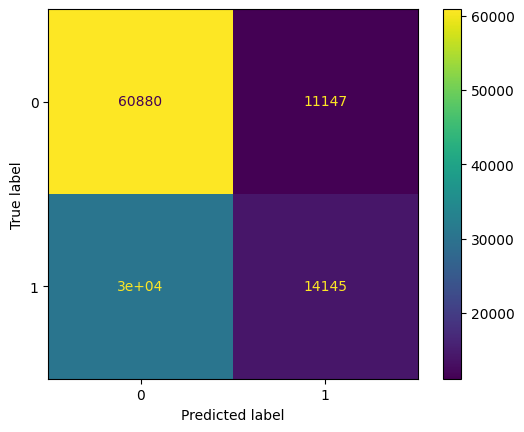

In [130]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [131]:
print("Accuracy of Gradient Boosting model 2:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 2: 0.6430916400229721


In [132]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.3168966753293306


In [133]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.8452385910838991


In [134]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.17669552657813292


### Include street and str

In [135]:
DV_data3 = pd.get_dummies(DV_data.drop(columns = ["OFFENSE_CATEGORY_ID", "INCIDENT_ADDRESS", "DISTRICT_ID", "NEIGHBORHOOD_ID"]))
DV_data3

,GEO_X,GEO_Y,PRECINCT_ID,year,month,day,hour,DayOfWeek,violent,street_#,...,str_WYNKOOP,str_XAVIER,str_XENIA,str_YALE,str_YATES,str_YORK,str_YOSEMITE,str_ZENOBIA,str_ZUNI,str_other
0,3133773.0,1702660.0,113,2017,6,25,20,6,True,0,...,0,0,0,0,0,0,0,0,0,0
1,3185904.0,1709037.0,521,2017,5,26,19,4,True,0,...,0,0,0,0,0,0,0,0,0,0
2,3140436.0,1699005.0,612,2017,6,27,16,1,True,0,...,0,0,0,0,0,0,0,0,0,0
3,3143338.0,1700561.0,612,2017,5,26,19,4,True,0,...,0,0,0,0,0,0,0,0,0,0
4,3132994.0,1696487.0,121,2017,7,7,21,4,True,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399567,3142109.0,1697318.0,611,2022,10,2,21,6,False,0,...,0,0,0,0,0,0,0,0,0,0
399568,3206327.0,1712283.0,523,2022,10,3,14,0,False,0,...,0,0,0,0,0,0,0,0,0,1
399569,3168587.0,1676396.0,322,2022,8,3,12,2,False,0,...,0,0,0,0,0,0,0,0,0,1
399570,3146166.0,1696259.0,621,2022,7,17,10,6,False,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X = DV_data3.loc[:, DV_data3.columns != 'violent']
y = DV_data3.violent

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  

In [138]:
GBoost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 14, verbose = 1, random_state = 0)
GBoost = GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3086           22.01m
         2           1.2894           22.49m
         3           1.2731           22.57m
         4           1.2619           23.11m
         5           1.2490           22.75m
         6           1.2343           22.62m
         7           1.2269           22.69m
         8           1.2193           21.98m
         9           1.2100           21.62m
        10           1.2041           21.10m
        20           1.1441           19.05m
        30           1.1113           17.85m
        40           1.0919           15.94m
        50           1.0767           14.04m
        60           1.0674           11.30m
        70           1.0627            8.54m
        80           1.0510            5.72m
        90           1.0452            2.87m
       100           1.0387            0.00s


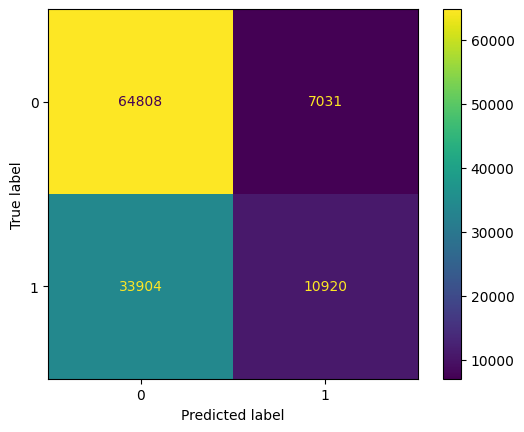

In [139]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [140]:
print("Accuracy of Gradient Boosting model 3:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy of Gradient Boosting model 3: 0.6491175436942304


In [141]:
print("Sensitivity:", metrics.recall_score(y_test, y_pred)) 

Sensitivity: 0.24361948955916474


In [142]:
print("Specificity:", metrics.recall_score(y_test, y_pred, pos_label = 0)) 

Specificity: 0.9021283703837748


In [143]:
print("Kappa:", metrics.cohen_kappa_score(y_test, y_pred)) 

Kappa: 0.1642645851596457


In [8]:
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 0)
for depth in range (12, 15):
    tree_classifier = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y, scoring = 'accuracy', cv = crossvalidation, n_jobs = 1))
    
    print(depth, score)

12 0.5876282196540337
13 0.5888150344931865
14 0.5888845112367738


In [9]:
GradBoost = GradientBoostingClassifier()
search_grid = {'n_estimators': [100, 300], 'learning_rate': [.01, .1], 'max_depth':[7, 14, 21], 'subsample': [.5, 1], 'random_state': [0]}
search = GridSearchCV(estimator = GradBoost, param_grid = search_grid, scoring = 'accuracy', n_jobs = 1, cv = crossvalidation, verbose = True)
search

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [7, 14, 21],
                         'n_estimators': [100, 300], 'random_state': [0],
                         'subsample': [0.5, 1]},
             scoring='accuracy', verbose=True)

In [ ]:
# # This block runs forever, I must be making some mistake
# result = search.fit(X_train, y_train)
# # print(search.best_params_)
# # print(search.best_score_)
# print("Best: %f using %s" % (result.best_score_, result.best_params_))